# TabularDNN

Use `ssh -L 8080:localhost:8080 username@example.com` to port forward 8080 on remote which will be running jupyter notebook to 8080 local then run `jupyter-notebook --no-browser --port 8080 .` on remote. After jupyter comes up use the provided links in terminal to open up jupyter notebook on your local browser. 

Use `/usr/bin/python3.11 -m venv venvName` to make venv. Use `source venvName/bin/activate` to enter venv. Python will be 3.11 when used either `python` or `python3`. To get out of venv use `deactivate`. `rm -r venvName` to delete venv.

Use `pip install tensorflow[and-cuda]` to install and check with `python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"` to see if GPU is set up. If GPU devices are shown then everything is OK.

Use `pip install jupyter` to have jupyter-notebook in venv. Check with `which jupyter` to see if correct jupyter is used. Use `python -m ipykernel install --user --name=venvName` to add venv to jupyter kernels. When creating new notebook instead of using python3 use venvName. To remove venv kernel from jupyter use `jupyter kernelspec remove venvName`

In [1]:
! python --version

Python 3.11.7


In [2]:
import pandas as pd
from sklearn import preprocessing
print(f"Pandas Version: {pd.__version__}")

Pandas Version: 2.2.3


In [3]:
df = pd.read_csv("dataset/AQI2.csv")
df.head()

,Date,Time,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,...,AQI,AQI-PM2.5,AQI-PM10,AQI-NO2,AQI-O3,Amount-PM2.5,Amount-PM10,Amount-NO2,Amount-O3,Filename
0,"WEDNESDAY, 16 OCTOBER",13:39,16,16,Mostly cloudy,9,0.72,0.54,Ideal Humidity,10,...,23,13,17,18,23,3,12,8,64,Seattle/67.png
1,"SUNDAY, 20 OCTOBER",14:24,19,18,Cloudy,25,0.67,0.63,Ideal Humidity,13,...,24,21,18,17,24,5,13,8,64,Seattle/209.png
2,"THURSDAY, 17 OCTOBER",17:30,11,12,Mostly cloudy,6,0.80,0.46,Ideal Humidity,8,...,37,13,14,37,15,3,10,18,45,Seattle/95.png
3,"SUNDAY, 20 OCTOBER",00:26,16,15,Mostly cloudy,17,0.94,0.73,Slightly Humid,15,...,27,20,16,27,14,4,11,13,43,Seattle/180.png
4,"SUNDAY, 20 OCTOBER",15:24,18,17,Light rain,27,0.76,0.66,Slightly Humid,14,...,19,14,12,17,19,3,9,8,55,Seattle/210.png


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3040 non-null   object 
 1   Time                3040 non-null   object 
 2   Temperature         3040 non-null   int64  
 3   Real Feel           3040 non-null   int64  
 4   Weather Status      3040 non-null   object 
 5   Wind Gusts          3040 non-null   int64  
 6   Humidity            3040 non-null   float64
 7   Indoor Humidity     3040 non-null   float64
 8   Humidity Status     3040 non-null   object 
 9   Dew Point           3040 non-null   int64  
 10  Pressure            3040 non-null   int64  
 11  Pressure Direction  3040 non-null   object 
 12  Cloud Cover         3040 non-null   float64
 13  Visibility          3040 non-null   float64
 14  Cloud Ceiling       3040 non-null   int64  
 15  AQI                 3040 non-null   int64  
 16  AQI-PM

#### Removing unnecessary columns + Only predicting AQI values for pollutants for now so drop others!

In [5]:
df = df.drop(["AQI", "Amount-PM2.5", "Amount-PM10", "Amount-NO2", "Amount-O3", "Filename"], axis = 1)

In [6]:
input_df = df.iloc[:, :-4]
input_df

,Date,Time,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,Pressure,Pressure Direction,Cloud Cover,Visibility,Cloud Ceiling
0,"WEDNESDAY, 16 OCTOBER",13:39,16,16,Mostly cloudy,9,0.72,0.54,Ideal Humidity,10,1015,↔,0.76,18.0,2700
1,"SUNDAY, 20 OCTOBER",14:24,19,18,Cloudy,25,0.67,0.63,Ideal Humidity,13,1010,↓,0.95,21.0,1900
2,"THURSDAY, 17 OCTOBER",17:30,11,12,Mostly cloudy,6,0.80,0.46,Ideal Humidity,8,1021,↑,0.76,21.0,12200
3,"SUNDAY, 20 OCTOBER",00:26,16,15,Mostly cloudy,17,0.94,0.73,Slightly Humid,15,1017,↓,0.81,15.0,700
4,"SUNDAY, 20 OCTOBER",15:24,18,17,Light rain,27,0.76,0.66,Slightly Humid,14,1010,↔,1.00,16.0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,"WEDNESDAY, 9 OCTOBER",11:32,30,32,Mostly sunny,47,0.55,0.55,Very Humid,20,1018,↔,0.28,16.0,9100
3036,"WEDNESDAY, 9 OCTOBER",15:31,30,29,Mostly cloudy,53,0.53,0.53,Very Humid,20,1015,↔,0.76,16.0,9100
3037,"WEDNESDAY, 9 OCTOBER",20:32,26,26,Mostly clear,35,0.70,0.70,Very Humid,20,1017,↑,0.25,16.0,9100
3038,"SATURDAY, 19 OCTOBER",13:06,30,33,Partly sunny,37,0.56,0.56,Very Humid,21,1018,↓,0.31,16.0,9100


In [7]:
output_df = df.iloc[:, -4:]
output_df

,AQI-PM2.5,AQI-PM10,AQI-NO2,AQI-O3
0,13,17,18,23
1,21,18,17,24
2,13,14,37,15
3,20,16,27,14
4,14,12,17,19
...,...,...,...,...
3035,31,22,1,17
3036,34,24,1,16
3037,33,23,2,14
3038,30,21,1,15


In [8]:
# Handling Time and Date
def encodeDate(date, year = 2024):
    months = {
        "JANUARY": 1,
        "FEBURARY": 2,
        "MARCH": 3,
        "APRIL": 4,
        "MAY": 5,
        "JUNE": 6,
        "JULY": 7,
        "AUGUST": 8,
        "SEPTEMBER": 9,
        "OCTOBER": 10,
        "NOVEMBER": 11,
        "DECEMBER": 12
    }
    day, month = date.split(",")[1].strip().split(" ")
    return year * (10 ** 8) + months[month] * (10 ** 6) + int(day) * (10 ** 4)

def encodeTime(time):
    hour, minute = time.split(":")
    return int(hour) * (10 ** 2) + int(minute)
    
input_df["Date"] = input_df["Date"].apply(lambda date: encodeDate(date))
input_df["Time"] = input_df["Time"].apply(lambda time: encodeTime(time))
input_df["DateTime"] = input_df["Date"] + input_df["Time"]
input_df = input_df.drop(["Date", "Time"], axis = 1)
input_df

,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,Pressure,Pressure Direction,Cloud Cover,Visibility,Cloud Ceiling,DateTime
0,16,16,Mostly cloudy,9,0.72,0.54,Ideal Humidity,10,1015,↔,0.76,18.0,2700,202410161339
1,19,18,Cloudy,25,0.67,0.63,Ideal Humidity,13,1010,↓,0.95,21.0,1900,202410201424
2,11,12,Mostly cloudy,6,0.80,0.46,Ideal Humidity,8,1021,↑,0.76,21.0,12200,202410171730
3,16,15,Mostly cloudy,17,0.94,0.73,Slightly Humid,15,1017,↓,0.81,15.0,700,202410200026
4,18,17,Light rain,27,0.76,0.66,Slightly Humid,14,1010,↔,1.00,16.0,2100,202410201524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,30,32,Mostly sunny,47,0.55,0.55,Very Humid,20,1018,↔,0.28,16.0,9100,202410091132
3036,30,29,Mostly cloudy,53,0.53,0.53,Very Humid,20,1015,↔,0.76,16.0,9100,202410091531
3037,26,26,Mostly clear,35,0.70,0.70,Very Humid,20,1017,↑,0.25,16.0,9100,202410092032
3038,30,33,Partly sunny,37,0.56,0.56,Very Humid,21,1018,↓,0.31,16.0,9100,202410191306


In [9]:
# One-hot Encoding

# weatherStatus = pd.get_dummies(df["Weather Status"], dtype = float, drop_first = True)
# humidityStatus = pd.get_dummies(df["Humidity Status"], dtype = float, drop_first = True)
# pressureDirection = pd.get_dummies(df["Pressure Direction"], dtype = float, drop_first = True)

# print(f"Weather Status One-Hot Shape: f{weatherStatus.shape}")
# print(f"Humidity Status One-Hot Shape: f{humidityStatus.shape}")
# print(f"Pressure Direction One-Hot Shape: f{pressureDirection.shape}")

In [10]:
# input_df = input_df.drop(["Weather Status", "Humidity Status", "Pressure Direction"], axis = 1)
# input_df = pd.concat([input_df, weatherStatus, humidityStatus, pressureDirection], axis = 1)
# input_df

In [11]:
# Label Encoder
labelEncoder = preprocessing.LabelEncoder()
input_df["Weather Status"] = labelEncoder.fit_transform(input_df["Weather Status"])
input_df["Humidity Status"] = labelEncoder.fit_transform(input_df["Humidity Status"])
input_df["Pressure Direction"] = labelEncoder.fit_transform(input_df["Pressure Direction"])

print(f"Weather Status Vals: {input_df['Weather Status'].unique()}")
print(f"Humidity Status Vals: {input_df['Humidity Status'].unique()}")
print(f"Pressure Direction Vals: {input_df['Pressure Direction'].unique()}")

Weather Status Vals: [10  3  6  9 12 13 17 11 14  1  2  0 16  5 18  4 15  8  7]
Humidity Status Vals: [4 6 5 1 2 0 3 8 7]
Pressure Direction Vals: [2 1 0]


In [12]:
# Used in training --> Conversion required for warning in normalization!
input_df = input_df.astype({
    "Temperature": "float64",
    "Real Feel": "float64",
    "Wind Gusts": "float64",
    "Dew Point": "float64",
    "Pressure": "float64",
    "Cloud Ceiling": "float64",
    "Weather Status": "float64",
    "Humidity Status": "float64",
    "Pressure Direction": "float64",
    "DateTime": "float64"
})

input_df

,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,Pressure,Pressure Direction,Cloud Cover,Visibility,Cloud Ceiling,DateTime
0,16.0,16.0,10.0,9.0,0.72,0.54,4.0,10.0,1015.0,2.0,0.76,18.0,2700.0,2.024102e+11
1,19.0,18.0,3.0,25.0,0.67,0.63,4.0,13.0,1010.0,1.0,0.95,21.0,1900.0,2.024102e+11
2,11.0,12.0,10.0,6.0,0.80,0.46,4.0,8.0,1021.0,0.0,0.76,21.0,12200.0,2.024102e+11
3,16.0,15.0,10.0,17.0,0.94,0.73,6.0,15.0,1017.0,1.0,0.81,15.0,700.0,2.024102e+11
4,18.0,17.0,6.0,27.0,0.76,0.66,6.0,14.0,1010.0,2.0,1.00,16.0,2100.0,2.024102e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,30.0,32.0,11.0,47.0,0.55,0.55,8.0,20.0,1018.0,2.0,0.28,16.0,9100.0,2.024101e+11
3036,30.0,29.0,10.0,53.0,0.53,0.53,8.0,20.0,1015.0,2.0,0.76,16.0,9100.0,2.024101e+11
3037,26.0,26.0,9.0,35.0,0.70,0.70,8.0,20.0,1017.0,0.0,0.25,16.0,9100.0,2.024101e+11
3038,30.0,33.0,13.0,37.0,0.56,0.56,8.0,21.0,1018.0,1.0,0.31,16.0,9100.0,2.024102e+11


In [13]:
output_df = output_df.astype({
    "AQI-PM2.5": "float64",
    "AQI-PM10": "float64",
    "AQI-NO2": "float64",
    "AQI-O3": "float64",
})

output_df

,AQI-PM2.5,AQI-PM10,AQI-NO2,AQI-O3
0,13.0,17.0,18.0,23.0
1,21.0,18.0,17.0,24.0
2,13.0,14.0,37.0,15.0
3,20.0,16.0,27.0,14.0
4,14.0,12.0,17.0,19.0
...,...,...,...,...
3035,31.0,22.0,1.0,17.0
3036,34.0,24.0,1.0,16.0
3037,33.0,23.0,2.0,14.0
3038,30.0,21.0,1.0,15.0


In [14]:
pd.concat([input_df, output_df], axis = 1).corr()

,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,Pressure,Pressure Direction,Cloud Cover,Visibility,Cloud Ceiling,DateTime,AQI-PM2.5,AQI-PM10,AQI-NO2,AQI-O3
Temperature,1.000000,0.960821,0.291895,0.360842,-0.382643,0.378511,0.062329,0.584011,-0.448319,-0.007789,0.031589,0.014993,0.022030,-0.194701,0.033882,0.131809,-0.403311,0.598682
Real Feel,0.960821,1.000000,0.346596,0.220743,-0.345052,0.376454,0.030454,0.583236,-0.373045,0.004278,-0.037566,0.034332,0.087751,-0.193968,0.080371,0.157381,-0.349340,0.550158
Weather Status,0.291895,0.346596,1.000000,0.074849,-0.313323,-0.111417,-0.020400,-0.010622,-0.035739,-0.038232,-0.173912,0.062882,0.168121,-0.159779,-0.022805,0.070398,-0.157119,0.328953
Wind Gusts,0.360842,0.220743,0.074849,1.000000,-0.050683,0.259689,0.096121,0.312561,-0.370280,-0.078178,0.307407,-0.099740,-0.260899,-0.074540,-0.105157,-0.108159,-0.476061,0.225766
Humidity,-0.382643,-0.345052,-0.313323,-0.050683,1.000000,0.582734,0.118627,0.494080,-0.064123,-0.037746,0.426678,-0.297603,-0.398780,0.082864,0.186371,-0.212052,0.019609,-0.443320
Indoor Humidity,0.378511,0.376454,-0.111417,0.259689,0.582734,1.000000,0.136525,0.883230,-0.417061,-0.060195,0.451515,-0.235107,-0.355815,-0.017535,0.142224,-0.135169,-0.314099,0.004752
Humidity Status,0.062329,0.030454,-0.020400,0.096121,0.118627,0.136525,1.000000,0.185995,0.065813,0.028084,0.021172,-0.094717,-0.078449,-0.007457,0.017640,-0.034164,-0.051543,-0.013324
Dew Point,0.584011,0.583236,-0.010622,0.312561,0.494080,0.883230,0.185995,1.000000,-0.445170,-0.032880,0.380912,-0.243235,-0.303199,-0.102652,0.184529,-0.087555,-0.365777,0.158110
Pressure,-0.448319,-0.373045,-0.035739,-0.370280,-0.064123,-0.417061,0.065813,-0.445170,1.000000,0.091001,-0.468921,0.029067,0.337852,0.429451,0.161365,0.136445,0.455097,-0.247853
Pressure Direction,-0.007789,0.004278,-0.038232,-0.078178,-0.037746,-0.060195,0.028084,-0.032880,0.091001,1.000000,-0.099764,0.024416,0.060914,0.030118,0.070414,0.061045,0.111341,-0.033208


In [15]:
import keras
from sklearn.model_selection import KFold
import numpy as np
from matplotlib import pyplot as plt
print(f"Keras Version: {keras.__version__}")

2024-10-21 17:33:17.352194: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 17:33:17.368677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 17:33:17.379538: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 17:33:17.382827: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 17:33:17.390814: I tensorflow/core/platform/cpu_feature_guar

Keras Version: 3.6.0


## Model

In [16]:
def get_model():
    inputs = keras.Input(shape = (input_df.shape[1],))
    x = keras.layers.Dense(8, activation = "relu")(inputs)
    x = keras.layers.Dense(8, activation = "relu")(x)
    outputs = keras.layers.Dense(output_df.shape[1])(x)
    
    model = keras.Model(inputs = inputs, outputs = outputs, name = "TabularDNN")
    model.compile(
        loss = keras.losses.MeanAbsoluteError(),
        optimizer = keras.optimizers.Adam(learning_rate = 0.001),
        metrics = ["r2_score"]
    )
    return model

In [17]:
get_model().summary()

I0000 00:00:1729541003.720852 3132437 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729541003.757800 3132437 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729541003.757934 3132437 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729541003.760187 3132437 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "TabularDNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# keras.utils.plot_model(get_model(), show_shapes = True)

========================= Fold 1 =========================
Epoch 1/100


I0000 00:00:1729541005.679332 3132550 service.cc:146] XLA service 0x7f91fc003f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729541005.679359 3132550 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-10-21 17:33:25.693738: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-21 17:33:26.751836: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-21 17:33:26.773083: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.0 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packag

 5/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.1094 - r2_score: -2.9503 

I0000 00:00:1729541007.266290 3132550 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 27.7832 - r2_score: -2.9052 - val_loss: 24.8522 - val_r2_score: -1.9420
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 26.4698 - r2_score: -2.7181 - val_loss: 23.2698 - val_r2_score: -1.7011
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 24.8475 - r2_score: -2.3248 - val_loss: 20.1132 - val_r2_score: -1.2269
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 20.2557 - r2_score: -1.4796 - val_loss: 15.5350 - val_r2_score: -0.5447
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 15.4397 - r2_score: -0.6007 - val_loss: 13.1835 - val_r2_score: -0.1223
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 13.1330 - r2_score: -0.1739 - val_loss: 12.4638 - val_r2_score: 0.0118
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 12.2104 - r2_score: -0.0758 - val_loss: 12.1099 - val_r2_score: 0.0671
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 11.7801 - r2_score: -0.

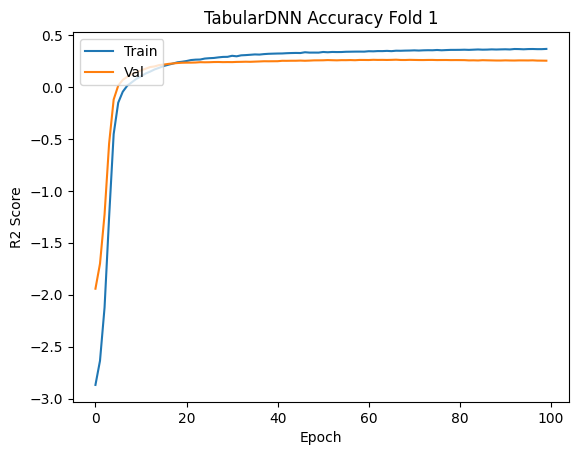

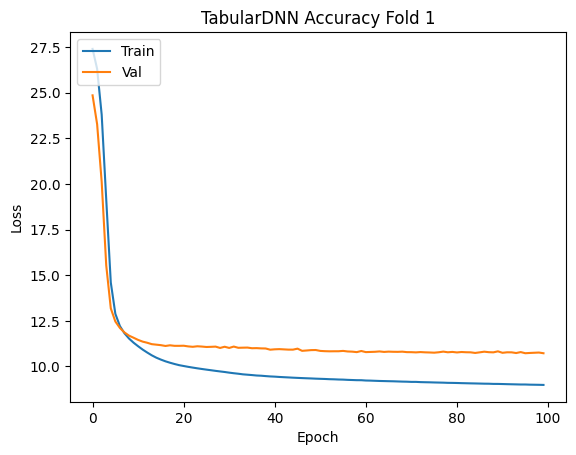

++++++++++++++++ Random Prediction ++++++++++++++++
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: [[24.024445 30.89561  21.937685 34.910774]]
Target: [[36. 56. 54. 12.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 2 =========================
Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 27.9051 - r2_score: -2.9771 - val_loss: 26.0216 - val_r2_score: -2.1332
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 26.6332 - r2_score: -2.6899 - val_loss: 24.3330 - val_r2_score: -1.8420
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.2566 - r2_score: -2.1925 - val_loss: 20.7780 - val_r2_score: -1.2578
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 19.5314 - r2_score: -1.4307 - val_loss: 17.2463 - val_r2_score: -0.6703
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 15.7886 - r2_score: -0.6748 - val_loss: 15.6974 - val_r2_score: -0.3759
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step -

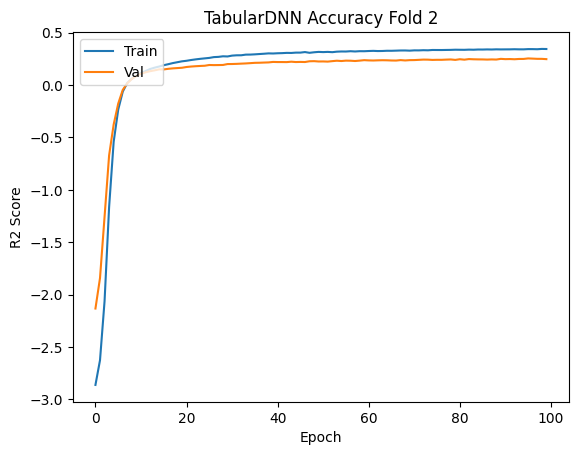

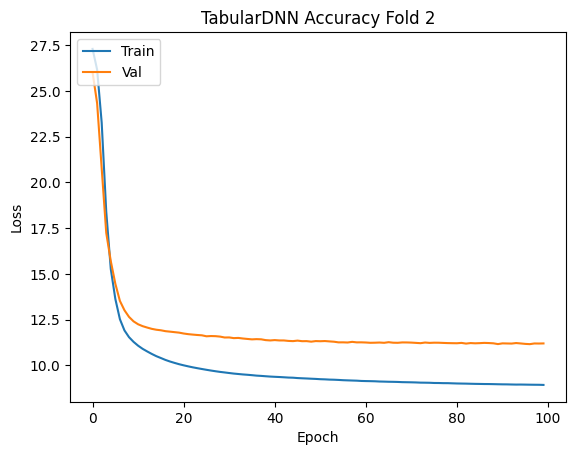

++++++++++++++++ Random Prediction ++++++++++++++++
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: [[16.59576  13.613156 29.374111  8.185864]]
Target: [[41. 23. 49.  4.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 3 =========================
Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26.9732 - r2_score: -2.5420 - val_loss: 27.2144 - val_r2_score: -3.6421
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 26.4058 - r2_score: -2.5281 - val_loss: 25.6187 - val_r2_score: -3.2530
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 24.4348 - r2_score: -2.0572 - val_loss: 21.1300 - val_r2_score: -2.1864
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 19.3645 - r2_score: -1.1706 - val_loss: 14.7913 - val_r2_score: -0.8010
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 14.1537 - r2_score: -0.2961 - val_loss: 13.2300 - val_r2_score: -0.4296
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step

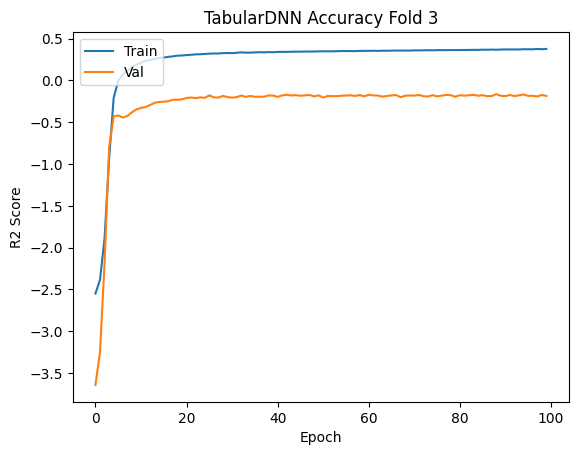

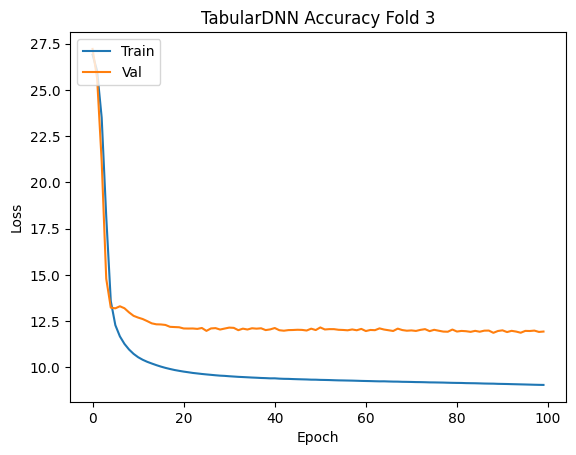

++++++++++++++++ Random Prediction ++++++++++++++++
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction: [[24.51605  29.527155 41.591763 22.963175]]
Target: [[21. 28. 21. 27.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 4 =========================
Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27.1344 - r2_score: -2.5049 - val_loss: 27.0081 - val_r2_score: -3.9535
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 25.8409 - r2_score: -2.2688 - val_loss: 25.3442 - val_r2_score: -3.4938
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 23.8636 - r2_score: -1.9916 - val_loss: 21.4609 - val_r2_score: -2.5145
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 19.4610 - r2_score: -1.1460 - val_loss: 16.5507 - val_r2_score: -1.3053
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 14.8156 - r2_score: -0.4547 - val_loss: 13.5975 - val_r2_score: -0.5663
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step

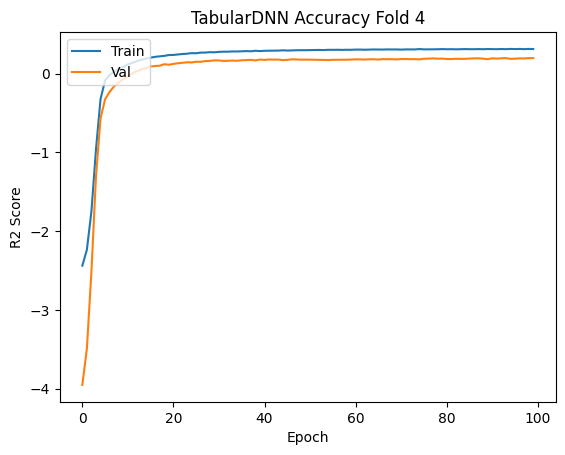

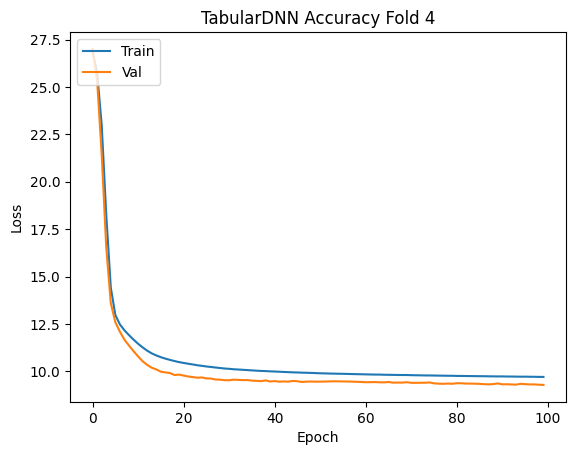

++++++++++++++++ Random Prediction ++++++++++++++++
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction: [[16.520489 16.655249 11.690058 17.969185]]
Target: [[ 9. 10. 24. 20.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 5 =========================
Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 26.2860 - r2_score: -2.5274 - val_loss: 27.9293 - val_r2_score: -2.8233
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 25.4856 - r2_score: -2.5368 - val_loss: 25.8914 - val_r2_score: -2.4277
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 23.2960 - r2_score: -1.9551 - val_loss: 21.5174 - val_r2_score: -1.6578
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 18.8000 - r2_score: -1.1650 - val_loss: 17.2898 - val_r2_score: -0.8370
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 14.6741 - r2_score: -0.4743 - val_loss: 15.1661 - val_r2_score: -0.3742
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

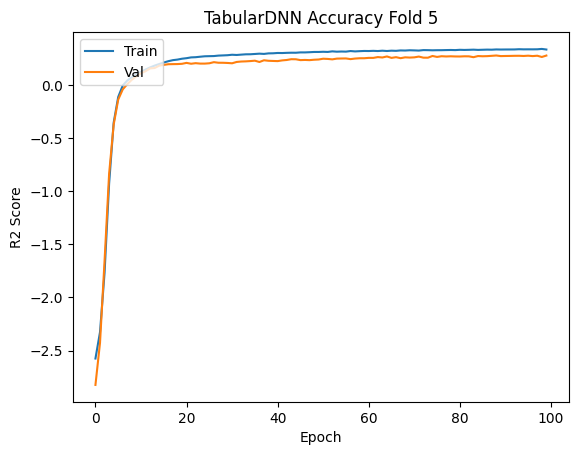

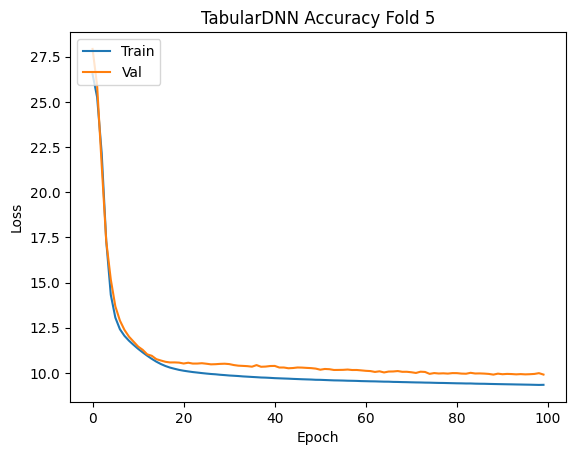

++++++++++++++++ Random Prediction ++++++++++++++++
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: [[33.980118 34.216984 43.930187 21.259075]]
Target: [[35. 43. 54. 18.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++


In [19]:
i = 1
kf = KFold(n_splits = 5)
pred_r2s = []; pred_losses = []
for train_idx, test_idx in kf.split(input_df, output_df):
    print(f"========================= Fold {i} =========================")
    
    train_X = input_df.loc[train_idx]; train_Y = output_df.loc[train_idx]
    test_X = input_df.loc[test_idx]; test_Y = output_df.loc[test_idx]

    # Min Max Normalization One-hot
    # temp_train_X = train_X.loc[:, :"Cloud Ceiling"]
    # train_X.loc[:, :"Cloud Ceiling"] = (temp_train_X - temp_train_X.min()) / (temp_train_X.max() - temp_train_X.min())
    # temp_test_X = test_X.loc[:, :"Cloud Ceiling"]
    # test_X.loc[:, :"Cloud Ceiling"] = (temp_test_X - temp_test_X.min()) / (temp_test_X.max() - temp_test_X.min())

    # Z-score Normalization One-hot
    # temp_train_X = train_X.loc[:, :"Cloud Ceiling"]
    # train_X.loc[:, :"Cloud Ceiling"] = (temp_train_X - temp_train_X.mean()) / temp_train_X.std()
    # temp_test_X = test_X.loc[:, :"Cloud Ceiling"]
    # test_X.loc[:, :"Cloud Ceiling"] = (temp_test_X - temp_test_X.mean()) / temp_test_X.std()

    # Z-score Normalization Label Encoding
    train_X = (train_X - train_X.mean()) / train_X.std()
    test_X = (test_X - test_X.mean()) / test_X.std()

    # One-hot columns Normalization
    # for col in train_X.loc[:, "Clear":].columns:
    #     if(train_X[col].std() == 0):
    #         train_X.loc[:, col] = 1 / len(train_X)
    #     else:
    #         train_X.loc[:, col] = (train_X[col] - train_X[col].mean()) / train_X[col].std()

    # for col in test_X.loc[:, "Clear":].columns:
    #     if(test_X[col].std() == 0):
    #         test_X.loc[:, col] = 1 / len(test_X)
    #     else:
    #         test_X.loc[:, col] = (test_X[col] - test_X[col].mean()) / test_X[col].std()
    
    
    # In normalization because of one-hot there were some NaN values --> all zeros in one training group, all ones in testing group
    # This shows where is training we have NaN --> If we have NaN in training then we will have NaN loss in training!
    # print(train_X.columns[train_X.isnull().any()])
    # print(test_X.columns[test_X.isnull().any()])
    
    model = get_model()
    
    history = model.fit(
        train_X,
        train_Y,
        batch_size = 32,
        epochs = 100,
        validation_data = (test_X, test_Y)
    )
    
    pred_loss, pred_r2 = model.evaluate(test_X, test_Y)
    pred_r2s.append(pred_r2); pred_losses.append(pred_loss)

    plt.plot(history.history["r2_score"])
    plt.plot(history.history["val_r2_score"])
    plt.title(f"TabularDNN Accuracy Fold {i}")
    plt.ylabel("R2 Score")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Val"], loc='upper left')
    plt.show()

    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title(f"TabularDNN Accuracy Fold {i}")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Val"], loc='upper left')
    plt.show()

    print("++++++++++++++++ Random Prediction ++++++++++++++++")
    idx = test_X.sample(1).index
    pred_y = model.predict(test_X.loc[idx])
    target_y = test_Y.loc[idx]
    print(f"Prediction: {pred_y}")
    print(f"Target: {target_y.values}")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++")

    i += 1

In [20]:
print(f"R2 Score: {np.mean(pred_r2s)} ± {np.std(pred_r2s)}")
print(f"Loss: {np.mean(pred_losses)} ± {np.std(pred_losses)}")

R2 Score: 0.15745638012886048 ± 0.17334889874221032
Loss: 10.61019401550293 ± 0.9349271776987225


In [21]:
import xgboost

========================= Fold 1 =========================
[0]	validation_0-error:-26.68945	validation_0-mae:10.87725	validation_1-error:-24.53660	validation_1-mae:12.55238
[1]	validation_0-error:-26.68945	validation_0-mae:9.31545	validation_1-error:-24.53660	validation_1-mae:11.90744
[2]	validation_0-error:-26.68945	validation_0-mae:8.24483	validation_1-error:-24.53660	validation_1-mae:11.54856
[3]	validation_0-error:-26.68945	validation_0-mae:7.56221	validation_1-error:-24.53660	validation_1-mae:11.38901
[4]	validation_0-error:-26.68945	validation_0-mae:7.03081	validation_1-error:-24.53660	validation_1-mae:11.36027
[5]	validation_0-error:-26.68945	validation_0-mae:6.69575	validation_1-error:-24.53660	validation_1-mae:11.28728
[6]	validation_0-error:-26.68945	validation_0-mae:6.40075	validation_1-error:-24.53660	validation_1-mae:11.19468
[7]	validation_0-error:-26.68945	validation_0-mae:6.18648	validation_1-error:-24.53660	validation_1-mae:11.18174
[8]	validation_0-error:-26.68945	val

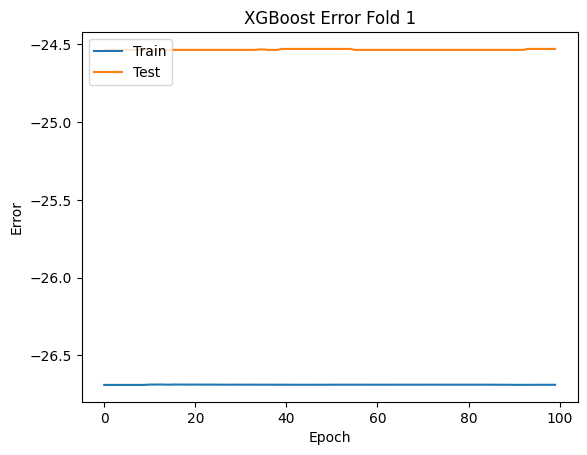

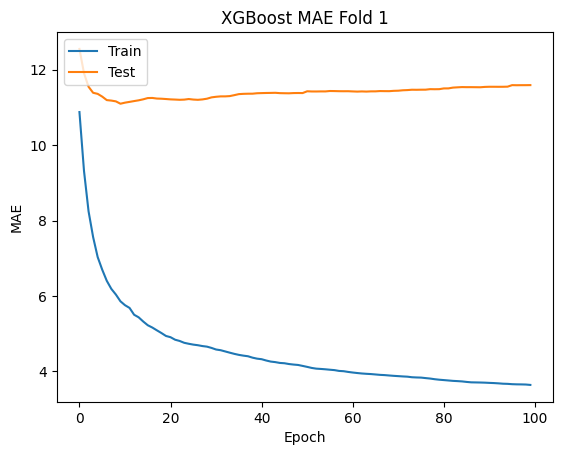

++++++++++++++++ Random Prediction ++++++++++++++++
Prediction: [[43.307625 23.171833 42.57923  12.218933]]
Target: [[23. 13.  1. 15.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 2 =========================
[0]	validation_0-error:-26.43832	validation_0-mae:10.77893	validation_1-error:-25.54112	validation_1-mae:13.24984
[1]	validation_0-error:-26.43832	validation_0-mae:9.24332	validation_1-error:-25.54112	validation_1-mae:12.30905
[2]	validation_0-error:-26.43832	validation_0-mae:8.24880	validation_1-error:-25.54112	validation_1-mae:11.78853
[3]	validation_0-error:-26.43832	validation_0-mae:7.50656	validation_1-error:-25.54112	validation_1-mae:11.48089
[4]	validation_0-error:-26.43832	validation_0-mae:6.98145	validation_1-error:-25.54112	validation_1-mae:11.29102
[5]	validation_0-error:-26.43832	validation_0-mae:6.56858	validation_1-error:-25.54112	validation_1-mae:11.12019
[6]	validation_0-error:-26.43832	validation_0-mae:6.29454	validation_1-err

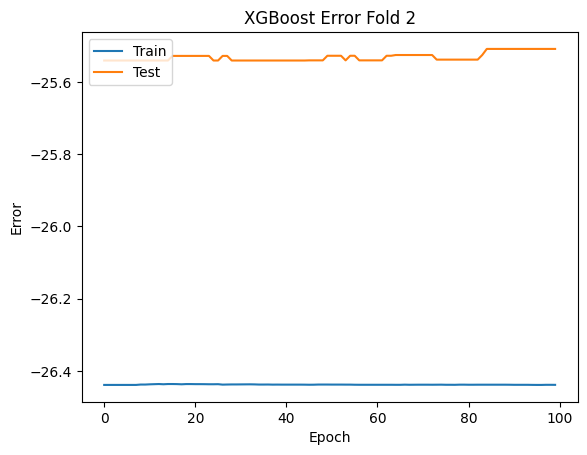

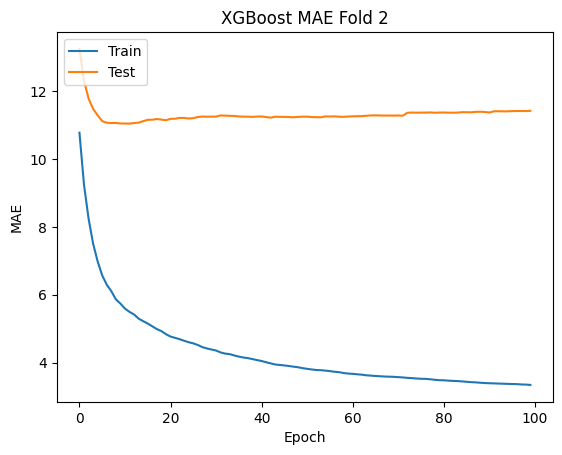

++++++++++++++++ Random Prediction ++++++++++++++++
Prediction: [[20.162361 23.010979 49.604477  3.453344]]
Target: [[33. 22. 51.  3.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 3 =========================
[0]	validation_0-error:-26.13405	validation_0-mae:11.22173	validation_1-error:-26.75822	validation_1-mae:10.87627
[1]	validation_0-error:-26.13405	validation_0-mae:9.54309	validation_1-error:-26.75822	validation_1-mae:10.56483
[2]	validation_0-error:-26.13405	validation_0-mae:8.46129	validation_1-error:-26.75822	validation_1-mae:10.47456
[3]	validation_0-error:-26.13405	validation_0-mae:7.66896	validation_1-error:-26.75822	validation_1-mae:10.47850
[4]	validation_0-error:-26.13405	validation_0-mae:7.10718	validation_1-error:-26.75822	validation_1-mae:10.58645
[5]	validation_0-error:-26.13405	validation_0-mae:6.71353	validation_1-error:-26.75822	validation_1-mae:10.54613
[6]	validation_0-error:-26.13405	validation_0-mae:6.38458	validation_1-err

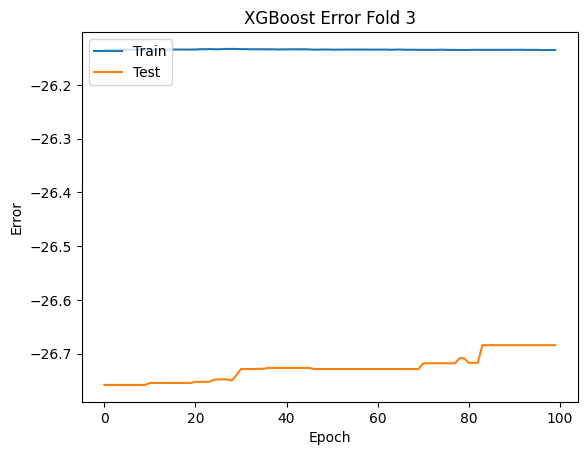

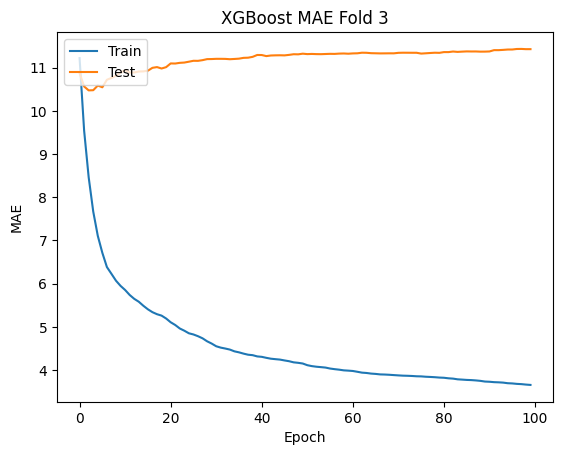

++++++++++++++++ Random Prediction ++++++++++++++++
Prediction: [[62.69506   35.95763   46.949074   0.4359452]]
Target: [[52. 34. 29. 12.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 4 =========================
[0]	validation_0-error:-26.14895	validation_0-mae:11.29392	validation_1-error:-26.69860	validation_1-mae:10.84005
[1]	validation_0-error:-26.14895	validation_0-mae:9.74493	validation_1-error:-26.69860	validation_1-mae:10.07864
[2]	validation_0-error:-26.14895	validation_0-mae:8.73629	validation_1-error:-26.69860	validation_1-mae:9.65697
[3]	validation_0-error:-26.14895	validation_0-mae:8.00102	validation_1-error:-26.69860	validation_1-mae:9.39951
[4]	validation_0-error:-26.14895	validation_0-mae:7.45288	validation_1-error:-26.69860	validation_1-mae:9.23849
[5]	validation_0-error:-26.14895	validation_0-mae:7.07358	validation_1-error:-26.69860	validation_1-mae:9.14394
[6]	validation_0-error:-26.14895	validation_0-mae:6.78810	validation_1-err

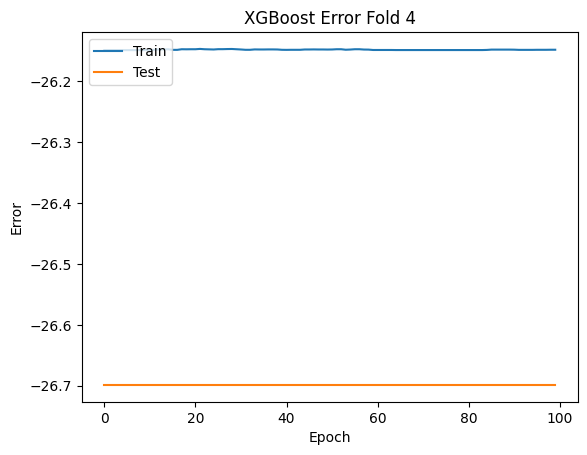

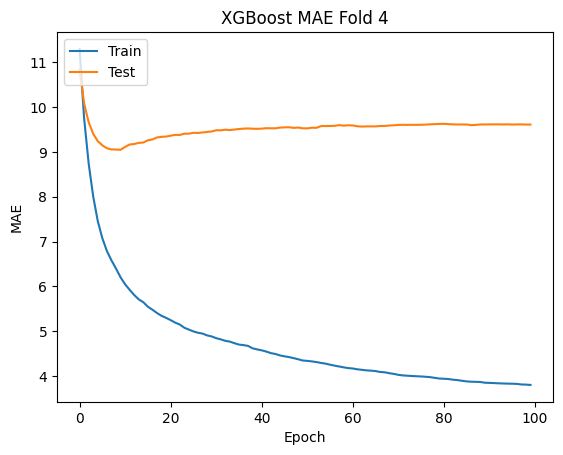

++++++++++++++++ Random Prediction ++++++++++++++++
Prediction: [[26.392654 29.935875 39.26568  22.20077 ]]
Target: [[42. 34. 51. 20.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 5 =========================
[0]	validation_0-error:-25.88363	validation_0-mae:10.98042	validation_1-error:-27.75987	validation_1-mae:12.94651
[1]	validation_0-error:-25.88363	validation_0-mae:9.54959	validation_1-error:-27.75987	validation_1-mae:11.77009
[2]	validation_0-error:-25.88363	validation_0-mae:8.51383	validation_1-error:-27.75987	validation_1-mae:11.16639
[3]	validation_0-error:-25.88363	validation_0-mae:7.82626	validation_1-error:-27.75987	validation_1-mae:10.89607
[4]	validation_0-error:-25.88363	validation_0-mae:7.38038	validation_1-error:-27.75987	validation_1-mae:10.60742
[5]	validation_0-error:-25.88363	validation_0-mae:7.02136	validation_1-error:-27.75987	validation_1-mae:10.46452
[6]	validation_0-error:-25.88363	validation_0-mae:6.70229	validation_1-err

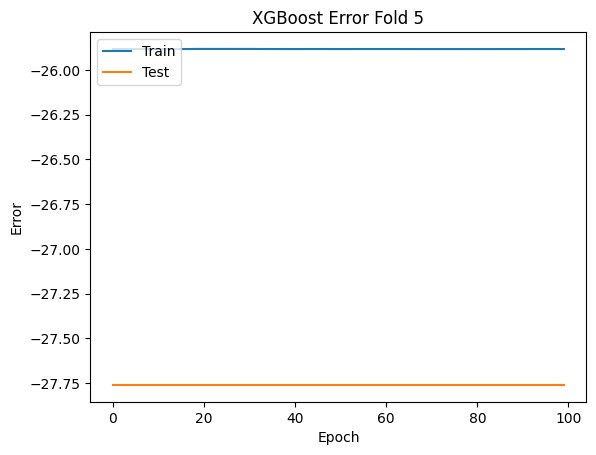

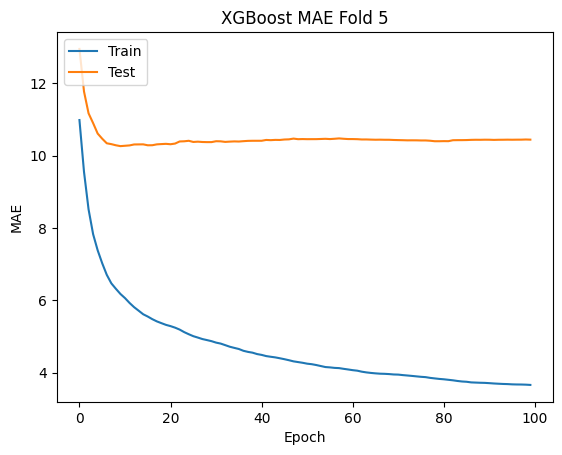

++++++++++++++++ Random Prediction ++++++++++++++++
Prediction: [[41.455765 28.985304 19.143545 23.144476]]
Target: [[19. 26. 30. 33.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++


In [22]:
i = 1
kf = KFold(n_splits = 5)
for train_idx, test_idx in kf.split(input_df, output_df):
    print(f"========================= Fold {i} =========================")
    
    train_X = input_df.loc[train_idx]; train_Y = output_df.loc[train_idx]
    test_X = input_df.loc[test_idx]; test_Y = output_df.loc[test_idx]

    # Z-score Normalization Label Encoding
    train_X = (train_X - train_X.mean()) / train_X.std()
    test_X = (test_X - test_X.mean()) / test_X.std()
    
    model = xgboost.XGBRegressor(
        eval_metric = ["error", "mae"],
        objective = "reg:absoluteerror"
    )
    
    model.fit(
        train_X,
        train_Y,
        eval_set = [(train_X, train_Y), (test_X, test_Y)],
    )

    res = model.evals_result()
    train_err, train_mae = res["validation_0"]["error"], res["validation_0"]["mae"]
    test_err, test_mae = res["validation_1"]["error"], res["validation_1"]["mae"]
    epochs = len(train_err)
    
    plt.plot(range(0, epochs), train_err)
    plt.plot(range(0, epochs), test_err)
    plt.title(f"XGBoost Error Fold {i}")
    plt.ylabel("Error")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc = "upper left")
    plt.show()

    plt.plot(range(0, epochs), train_mae)
    plt.plot(range(0, epochs), test_mae)
    plt.title(f"XGBoost MAE Fold {i}")
    plt.ylabel("MAE")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc = "upper left")
    plt.show()

    print("++++++++++++++++ Random Prediction ++++++++++++++++")
    idx = test_X.sample(1).index
    pred_y = model.predict(test_X.loc[idx])
    target_y = test_Y.loc[idx]
    print(f"Prediction: {pred_y}")
    print(f"Target: {target_y.values}")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++")

    i += 1